# <center> Проверка данных на нормальность данных и на наличие корреляции

Учащийся: **Станислав Король**

Группа: **DST-136**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

В качестве данных для проверки нормальности и наличия корреляции нам дана информация по размерам раковин мидий, выращенных в Санкт-Петербурге и Магадане.

In [2]:
petersburg = [
    0.0974, 0.1352, 0.0817, 0.1016,
    0.0968, 0.1064, 0.105, None
]
magadan = [
    0.1033, 0.0915, 0.0781, 0.0685,
    0.0677, 0.0697, 0.0764, 0.0689
]

H0_result = 'P-value теста больше уровня значимости - результаты статистически\
 не значимые и мы не можем отвергнуть нулевую гипотезу'
Ha_result = 'P-value теста меньше уровня значимости - результаты статистически\
 значимы и согласуются с альтернативной гипотезой'


def print_stat_info(r: list, H0: str, Ha: str, a: float, n: str) -> None:
    """Форматированный вывод результатов статистической функции

    Args:
        r (list): Результат статистической функции
        H0 (str): Нулевая гипотеза
        Ha (str): Альтернативня гипотеза
        a (float): Уровень значимости
        n (str): Название статистической функции
    """
    test_output = f'''
{H0}
{Ha}
Уровень значимости (alpha) = {a}
{n} значение P-value = {r[1]:.3f}
'''
    print(test_output)
    print(H0_result) if r[1] > a else print(Ha_result)


## Объединяем данные в один DataFrame

In [3]:
mussels = pd.DataFrame({'Petersburg': petersburg, 'Magadan': magadan})

print('DataFrame mussels:')
display(mussels)

# Заполняем пустые значения средним значением по столбцу, для
# корректной работы статистических тестов
mussels = mussels.fillna({'Petersburg': mussels['Petersburg'].mean()})

print('"Очищенный" DataFrame mussels:')
mussels

DataFrame mussels:


,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


"Очищенный" DataFrame mussels:


,Petersburg,Magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


## Тест на корреляцию

**Обоснование:** при помощи корреляции можно выяснить связаны ли переменные. Т.к. размеры раковин мидий, являются непрерывными значениями - будем рассчитывать параметрический тест на корреляцию Пирсона.

In [4]:
p_cor = mussels.corr().values[1, 0]

print(f'Значение корреляции Пирсона: {p_cor:.3f}')

Значение корреляции Пирсона: 0.245


**Вывод:** Корреляция Пирсона для размеров раковин мидий из Санкт-Петербурга и Магадана, составляет 0.245 - что означяет очень слабую связь между размерами раковин из разных городов. Таким образом размер раковин мидий из Санкт-Петербурга очень слабо влияет на размер раковин мидий из Магадана и наоборот.

## Проверка на нормальность распределения выборки

**Обоснование:** для определения нормальности распределения выборки существуют тест Шапиро-Уилка и тест Д’Агостино K-квадрат. В нашем случае будет использован тест Шапиро-Уилка т.к. он используется для небольшого количества данных (до тысячи наблюдений). В DataFrame mussels - 16 наблюдений. Тест Д’Агостино K-квадрат не может быть использован, т.к. он применяется на выборках, где 20 и более наблюдений. Дополнительно для визуального контроля отобразим Q-Q график.

In [5]:
H0 = 'Нулевая гипотеза: Данные распределены нормально'
Ha = 'Альтернативная гипотеза: Данные не распределены нормально'
alpha = 0.05
test_name = 'Тест Шапиро-Уилка'

print_stat_info(stats.shapiro(mussels), H0, Ha, alpha, test_name)


Нулевая гипотеза: Данные распределены нормально
Альтернативная гипотеза: Данные не распределены нормально
Уровень значимости (alpha) = 0.05
Тест Шапиро-Уилка значение P-value = 0.100

P-value теста больше уровня значимости - результаты статистически не значимые и мы не можем отвергнуть нулевую гипотезу


Q-Q график

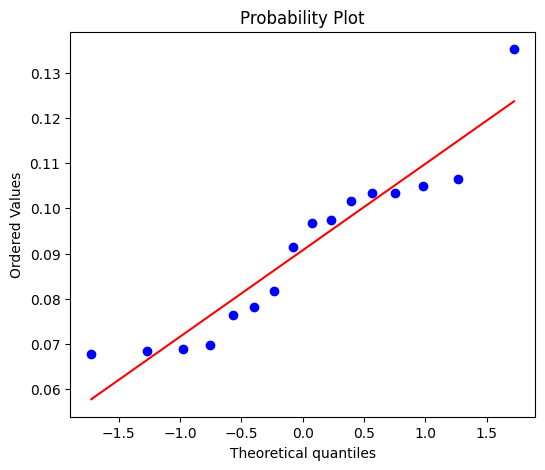

In [6]:
fig, axes = plt.subplots(figsize=(6, 5))
stats.probplot(
    list(mussels['Petersburg']) + list(mussels['Magadan']),
    plot=plt
)
plt.show()

**Вывод:** Нулевая гипотеза "Данные распределены нормально" не может быть отвергнута, т.к. P-value (0.1) больше уровня значимости (0.05). Следовательно данные в выборке исследований mussels нормально распределены (также это видно по Q-Q графику).

## Тест на сравнение выборок

**Обоснование:** В выборке mussels одна категориальная переменная (город) и одна количественная (размер раковины мидии), соответственно для сравнения выборок будет использован дисперсионный анализ (ANOVA).

In [7]:
H0 = 'Нулевая гипотеза: Разница среднего размера раковин мидий из \
Санкт-Петербурга и Магадана не значительна'
Ha = 'Альтернативная гипотеза: Разница среднего размера раковин мидий из \
Санкт-Петербурга и Магадана значительна'
alpha = 0.05
test_name = 'Дисперсионный анализ (ANOVA)'

print_stat_info(
    stats.f_oneway(mussels['Petersburg'], mussels['Magadan']),
    H0, Ha, alpha, test_name
)


Нулевая гипотеза: Разница среднего размера раковин мидий из Санкт-Петербурга и Магадана не значительна
Альтернативная гипотеза: Разница среднего размера раковин мидий из Санкт-Петербурга и Магадана значительна
Уровень значимости (alpha) = 0.05
Дисперсионный анализ (ANOVA) значение P-value = 0.003

P-value теста меньше уровня значимости - результаты статистически значимы и согласуются с альтернативной гипотезой


**Вывод:** Нулевая гипотеза "Разница среднего размера раковин мидий из Санкт-Петербурга и Магадана не значительна" отвергнута, т.к. P-value (0.003) меньше уровня значимости (0.05). Есть значимая разница между размерами раковин мидий в Санкт-Петербурге и Магадане.